In [1]:
from src.densite_function import *
from src.gaussian_simulation import *
from src.estimators import *
from src.vraisemblance import *
import numpy as np
import matplotlib.pylab as plt

# Préalable

On tire $\mathbf{x}$ et $\theta$ au hasard dans $\mathbb{R}^{20}$.

In [2]:
np.random.seed(10)

x=np.random.uniform(size=20, low=-10, high=10)
theta=np.random.uniform(size=20, low=-10, high=10)

On fixe les paramètres $A$ et $b$ optimaux.

In [3]:
A=np.matrix(np.identity(20))*0.5
b=theta/2

# Estimateurs de la log-vraisemblance

On estime la vraisemblance au point $\mathbf{x}$. Dans un premier temps, on prend k=100 pour l'estimateur IAWE.

### IAWE

In [6]:
np.random.seed(589)
importance_sampling_logvraisemblance(k=100, theta=theta, A=A, b=b, x=x)

-427.1063755313533

### SUMO

In [10]:
np.random.seed(84848)
estimateur_SUMO_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)

-426.9952274465489

### ML-SS

In [11]:
np.random.seed(788)
estimateur_ML_SS_logvraisemblance(x, theta, A, b, r=0.6)

-426.6392304152156

### ML-RR

In [14]:
np.random.seed(12369)
estimateur_ML_RR_logvraisemblance(x, theta, A, b, r=0.6)

-426.9217820766005

### Vraie valeur de la log-vraisemblance

In [12]:
log_vraisemblance(x, theta)

-427.1362945070707

# Procédure de Monte Carlo

Pour estimer le biais et la variance des estimateurs, on fait 12 procédures de Monte Carlo: lors de la première, on génère 100 observations, puis 200, 300, ..., 1000. On fixe M, le nombre de répétitions de Monte Carlo.

In [116]:
def procedure_MC(M, k, x, theta, A, b):
    m=0
    estimations_IWAE=np.array([])
    estimations_SUMO=np.array([])
    estimations_SS=np.array([])
    estimations_RR=np.array([])


    while m<M:
        log_vraisemblance_estim_IWAE=importance_sampling_logvraisemblance(k=k, theta=theta, A=A, b=b, x=x)
        log_vraisemblance_estim_SUMO=estimateur_SUMO_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)
        log_vraisemblance_estim_SS=estimateur_ML_SS_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)
        log_vraisemblance_estim_RR=estimateur_ML_RR_logvraisemblance(theta=theta, A=A, b=b, x=x, r=0.6)


        estimations_IWAE= np.append(estimations_IWAE, log_vraisemblance_estim_IWAE)
        estimations_SUMO=np.append(estimations_SUMO, log_vraisemblance_estim_SUMO)
        estimations_SS=np.append(estimations_SS, log_vraisemblance_estim_SS)
        estimations_RR=np.append(estimations_RR, log_vraisemblance_estim_RR)
        m+=1
    
    biais_IWAE_M=np.mean(estimations_IWAE)-log_vraisemblance(x=x, theta=theta)
    biais_SUMO_M=np.mean(estimations_SUMO)-log_vraisemblance(x=x, theta=theta)
    biais_SS_M=np.mean(estimations_SS)-log_vraisemblance(x=x, theta=theta)
    biais_RR_M=np.mean(estimations_RR)-log_vraisemblance(x=x, theta=theta)

    var_IWAE_M=np.var(estimations_IWAE)
    var_SUMO_M=np.var(estimations_SUMO)
    var_SS_M=np.var(estimations_SS)
    var_RR_M=np.var(estimations_RR)


    return biais_IWAE_M, biais_SUMO_M, biais_SS_M, biais_RR_M, var_IWAE_M, var_SUMO_M, var_SS_M, var_RR_M

Pour vérifier que le choix de M est suffisant, on teste la procédure avec $k=100$, et on trace le graphe des moyennes ergodiques. On teste M entre 50 et 200, avec un pas de 25.

In [117]:
np.random.seed(8554)

choix_M=np.arange(50,225, 25)
biais_m={}
var_m={}

for m in choix_M:
    res=procedure_MC_IWAE(M=m, k=100, x=x, theta=theta, A=A, b=b)
    biais_m[m]=res[0]
    var_m[m]=res[1]


In [120]:
biais_m

{50: -0.0047868699643913715,
 75: -0.007541374839775017,
 100: -0.023067653786313258,
 125: 0.005657486275822521,
 150: -0.012196617805273036,
 175: 0.011193165256315751,
 200: -0.00011964407252662568}

C:\Users\yanis\AppData\Local\Temp\ipykernel_37172\4210752280.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(m, biais, 'b', label="Biais de l'estimateur IWAE", color="blue")
C:\Users\yanis\AppData\Local\Temp\ipykernel_37172\4210752280.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[1].plot(m, var, 'b', label="Variance de l'estimateur IAWE", color="red")


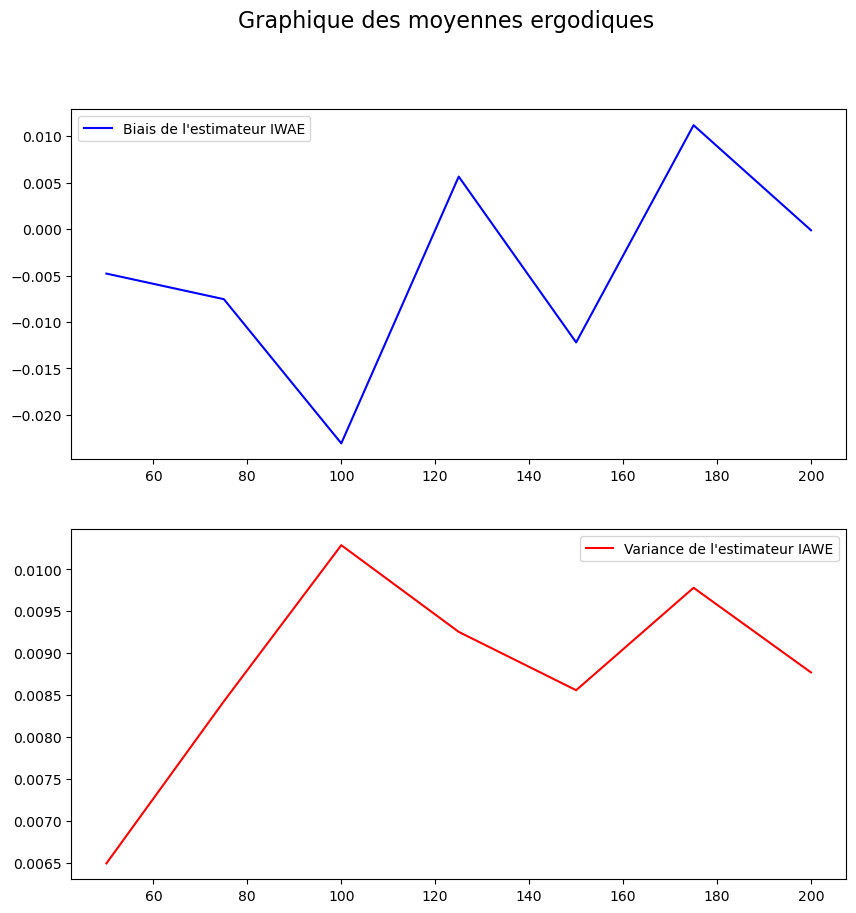

In [ ]:
sorted_biais_m = sorted(biais_m.items())
sorted_var_m = sorted(var_m.items())

m, biais = zip(*sorted_biais_m)
m, var = zip(*sorted_var_m) 

fig, axs = plt.subplots(1,2, figsize=(10, 10))

axs[0].plot(m, biais, 'b', label="Biais de l'estimateur IWAE", color="blue")
axs[0].legend()

fig.suptitle('Graphique des moyennes ergodiques', fontsize=16)

axs[1].plot(m, var, 'b', label="Variance de l'estimateur IAWE", color="red")
axs[1].legend()

plt.show()

Au fil des itérations, le biais et la variance ne varient pas significativement. Passé $M \approx 160 $, la variance semble être stable. On choisit donc ce nombre de répétitions de Monte Carlo.

In [155]:
nb_observations=np.arange(100,1100, 100)
biais_result={}
var_result={}

for k in nb_observations:
   res=procedure_MC_IWAE(M=160, k=k, x=x, theta=theta, A=A, b=b)
   biais_result[k]=res[0]
   var_result[k]=res[1]

0
100


c:\Users\yanis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yanis\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


200
300
400
500
600
700
800
900
1000


C:\Users\yanis\AppData\Local\Temp\ipykernel_37172\573048430.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[0].plot(k, biais_k_squared, 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
C:\Users\yanis\AppData\Local\Temp\ipykernel_37172\573048430.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[1].plot(k, var_k, 'b', label="Variance de l'estimateur IAWE", color="red")


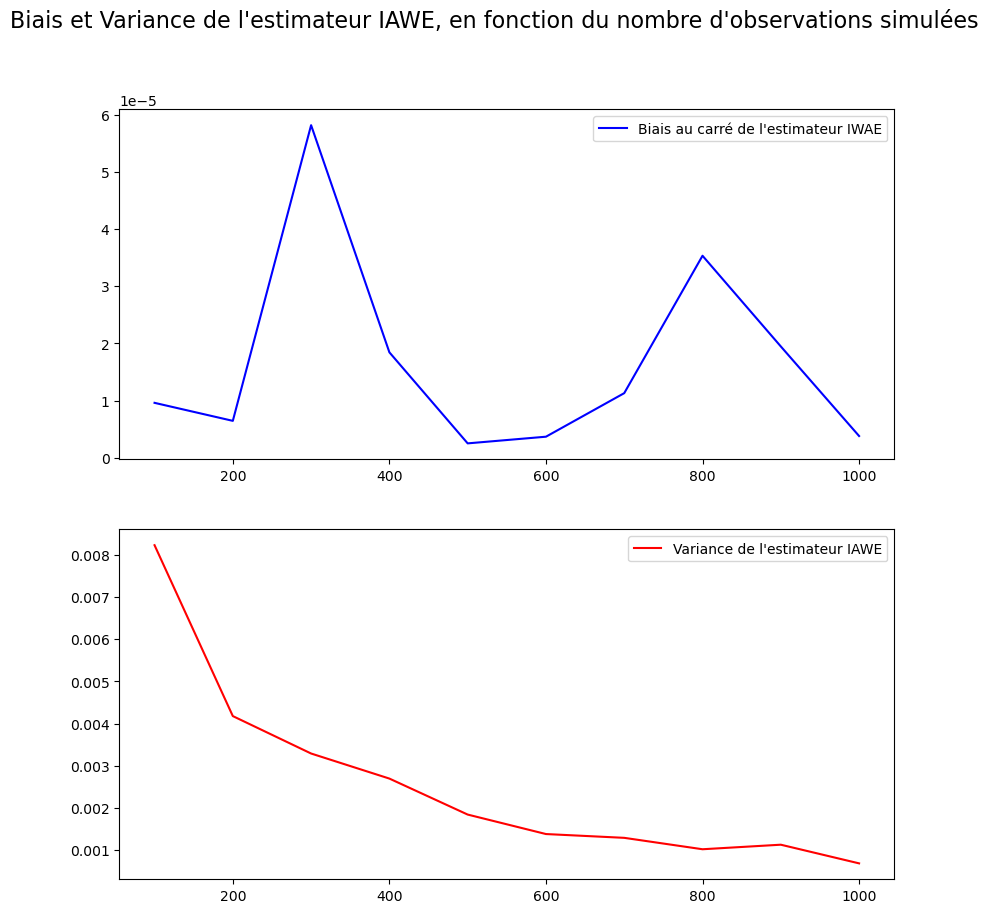

In [159]:
sorted_biais_res = sorted(biais_result.items())
sorted_var_res = sorted(var_result.items())

k, biais_k = zip(*sorted_biais_res)
k, var_k = zip(*sorted_var_res) 

k=np.array(k)
biais_k=np.array(biais_k)
var_k=np.array(var_k)

biais_k_squared=np.array([v**2 for v in biais_k])

fig, axs = plt.subplots(2,1, figsize=(10, 10))


axs[0].plot(k, biais_k_squared, 'b', label="Biais au carré de l'estimateur IWAE", color="blue")
axs[0].legend()


fig.suptitle("Biais et Variance de l'estimateur IAWE, en fonction du nombre d'observations simulées", fontsize=16)

axs[1].plot(k, var_k, 'b', label="Variance de l'estimateur IAWE", color="red")
axs[1].legend()

plt.show()